<a href="https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/subgraphMining/topk/tkg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding top-k frequent subgraphs in graph databases using TKG

This tutorial has two parts.
1.   Basic approach to find  frequent subgraphs at a single k value
2.   Advanced approach to find frequent subgraphs by varying k value

# Prerequisites:

### Step 1: Download the latest version of PAMI repository

In [1]:
!pip install -U pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.1/897.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.9 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3314 sha256=d4288c7c1ca1a724f63d85a6c28fd702ed2ce514bcb21120316baf9799427d6e
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4752 sha256=f87e37dfde74237e6700d0e2ec6c82b11e4f8a361d7e48539be9c0e969fc1b6a
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


### Step 2: Download the sample graph database from the SPMF library

In [2]:
!wget https://www.philippe-fournier-viger.com/spmf/datasets/Chemical_340.txt

--2024-03-13 16:46:31--  https://www.philippe-fournier-viger.com/spmf/datasets/Chemical_340.txt
Resolving www.philippe-fournier-viger.com (www.philippe-fournier-viger.com)... 104.21.33.228, 172.67.193.154, 2606:4700:3035::ac43:c19a, ...
Connecting to www.philippe-fournier-viger.com (www.philippe-fournier-viger.com)|104.21.33.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169680 (166K) [text/plain]
Saving to: ‘Chemical_340.txt’

Chemical_340.txt    100%[===================>] 165.70K  --.-KB/s    in 0.07s   

2024-03-13 16:46:31 (2.47 MB/s) - ‘Chemical_340.txt’ saved [169680/169680]



### Step 3: Printing a few lines of the graph database

In [3]:
!head -30 Chemical_340.txt

t # 0
v 0 0
v 1 0
v 2 0
v 3 0
v 4 0
v 5 0
v 6 1
v 7 1
v 8 1
v 9 1
v 10 2
v 11 0
v 12 0
v 13 2
v 14 0
v 15 0
v 16 0
v 17 0
v 18 1
v 19 1
v 20 1
v 21 3
v 22 3
v 23 4
v 24 5
v 25 5
e 0 1 3
e 1 2 3
e 2 3 3


# Basic approach: Discovering frequent subgraphs using a single minimum support

### Step 1: Understanding the statistics of the graph database

In [4]:
from PAMI.extras.stats import graphDatabase as alg

obj = alg.graphDatabase(iFile='Chemical_340.txt')

obj.printGraphDatabaseStatistics()

#obj.printIndividualGraphStats()     #prints additional information pertaining to each graph that exists in the data

average_nodes: 27.026470588235295
average_edges: 27.402941176470588
max_nodes: 214
min_nodes: 2
max_edges: 214
min_edges: 1
total_unique_vertex_labels: 66
total_unique_edge_labels: 4


### Step 2: Drawing the frequency graphs

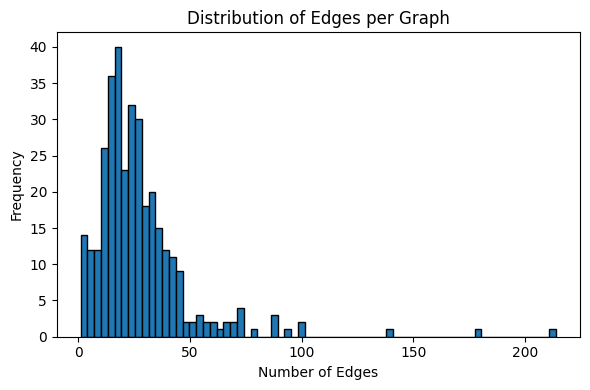

In [5]:
obj.plotEdgeDistribution()

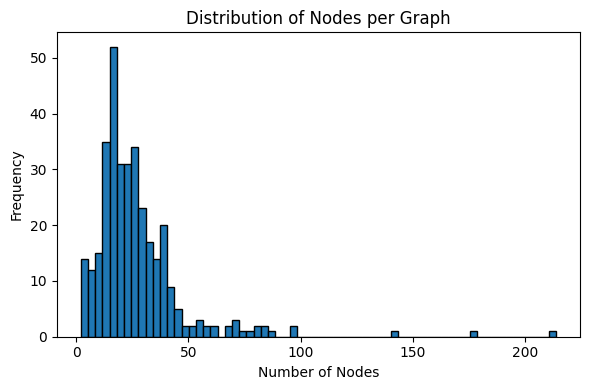

In [6]:
obj.plotNodeDistribution()

### Step 3: Choosing an appropriate k value

In [9]:
totalNumberofSubgraphsNeeded=100

### Step 4: Top-k frequent subgraph discovery using TKG

In [11]:
from PAMI.subgraphMining.topK import tkg as alg

obj = alg.TKG(iFile='Chemical_340.txt',k=totalNumberofSubgraphsNeeded)

obj.startMine()

frequentGraphs = obj.getKSubgraphs()


memUSS = obj.getMemoryUSS()
print("Total Memory in USS:", memUSS)

memRSS = obj.getMemoryRSS()
print("Total Memory in RSS", memRSS)

run = obj.getRuntime()
print("Total ExecutionTime in seconds:", run)


obj.save('frequentTopkSubgraphs.txt')

t # 0 * 234
v 0 1
v 1 9
e 0 1 0



t # 1 * 220
v 0 1
v 1 9
v 2 1
e 0 1 0
e 1 2 0



t # 2 * 213
v 0 0
v 1 0
v 2 0
e 0 1 3
e 0 2 3



t # 3 * 213
v 0 0
v 1 0
v 2 0
e 0 1 3
e 1 2 3



t # 4 * 213
v 0 0
v 1 0
e 0 1 3



t # 5 * 212
v 0 0
v 1 0
v 2 0
v 3 0
e 0 1 3
e 0 2 3
e 2 3 3



t # 6 * 212
v 0 0
v 1 0
v 2 0
v 3 0
e 0 1 3
e 1 2 3
e 2 3 3



t # 7 * 212
v 0 0
v 1 0
v 2 0
v 3 0
e 0 1 3
e 1 2 3
e 0 3 3



t # 8 * 206
v 0 0
v 1 0
v 2 0
v 3 1
e 0 1 3
e 0 2 3
e 0 3 0



t # 9 * 206
v 0 0
v 1 1
v 2 0
e 0 1 0
e 0 2 3



t # 10 * 206
v 0 0
v 1 0
v 2 1
e 0 1 3
e 0 2 0



t # 11 * 206
v 0 0
v 1 0
v 2 1
e 0 1 3
e 1 2 0



t # 12 * 206
v 0 0
v 1 0
v 2 1
v 3 0
e 0 1 3
e 1 2 0
e 1 3 3



t # 13 * 206
v 0 0
v 1 1
e 0 1 0



t # 14 * 206
v 0 0
v 1 0
v 2 0
v 3 1
e 0 1 3
e 1 2 3
e 1 3 0



t # 15 * 206
v 0 0
v 1 1
v 2 0
v 3 0
e 0 1 0
e 0 2 3
e 0 3 3



t # 16 * 206
v 0 0
v 1 0
v 2 1
v 3 0
e 0 1 3
e 0 2 0
e 0 3 3



t # 17 * 205
v 0 0
v 1 0
v 2 0
v 3 0
v 4 1
e 0 1 3
e 0 2 3
e 2 3 3
e 0 4 0



t # 18 * 205

### Step 5: Investigate the generated subgraphs

In [12]:
!head -10 frequentTopkSubgraphs.txt

t # 0 * 234
v 0 1
v 1 9
e 0 1 0


t # 1 * 220
v 0 1
v 1 9
v 2 1


***

# Advanced approach: Discovering top-k frequent subgraphs by varying k value

### Step 1: Import the libraries and specify the input parameters

In [15]:
#Import the libraries
from PAMI.subgraphMining.topK import tkg as alg
from PAMI.extras.messaging import gmail as msg

import pandas as pd

#Specify the input parameters
inputFile = 'Chemical_340.txt'
seperator='\t'
kValueList = [100,150,200,250,300,350,400]

#Specify the inpur parameters for sending email through your gmail
fromAddress = 'your@email.com'
passwd ='type the password'
destination ='toAddress@email.com'

### Step 2: Create a data frame to store the results of TKG

In [17]:
result = pd.DataFrame(columns=['algorithm', 'kValue', 'patterns', 'runtime', 'memory'])

### Step 3: Execute the algorithm at different k values

In [19]:
#message = msg.gmail(userName=fromAddress, password=passwd)

for kValue in kValueList:
    obj = alg.TKG('Chemical_340.txt', kValue)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['TKG', kValue, len(obj.getKSubgraphs()), obj.getRuntime(), obj.getMemoryRSS()]

#message.send(toAddress=destination, subject='Gspan', body='Mining process completed')
#above line sends an email once the code has completed execution.

t # 0 * 234
v 0 1
v 1 9
e 0 1 0



t # 1 * 220
v 0 1
v 1 9
v 2 1
e 0 1 0
e 1 2 0



t # 2 * 213
v 0 0
v 1 0
v 2 0
e 0 1 3
e 0 2 3



t # 3 * 213
v 0 0
v 1 0
v 2 0
e 0 1 3
e 1 2 3



t # 4 * 213
v 0 0
v 1 0
e 0 1 3



t # 5 * 212
v 0 0
v 1 0
v 2 0
v 3 0
e 0 1 3
e 0 2 3
e 2 3 3



t # 6 * 212
v 0 0
v 1 0
v 2 0
v 3 0
e 0 1 3
e 1 2 3
e 2 3 3



t # 7 * 212
v 0 0
v 1 0
v 2 0
v 3 0
e 0 1 3
e 1 2 3
e 0 3 3



t # 8 * 206
v 0 0
v 1 0
v 2 0
v 3 1
e 0 1 3
e 0 2 3
e 0 3 0



t # 9 * 206
v 0 0
v 1 1
v 2 0
e 0 1 0
e 0 2 3



t # 10 * 206
v 0 0
v 1 0
v 2 1
e 0 1 3
e 0 2 0



t # 11 * 206
v 0 0
v 1 0
v 2 1
e 0 1 3
e 1 2 0



t # 12 * 206
v 0 0
v 1 0
v 2 1
v 3 0
e 0 1 3
e 1 2 0
e 1 3 3



t # 13 * 206
v 0 0
v 1 1
e 0 1 0



t # 14 * 206
v 0 0
v 1 0
v 2 0
v 3 1
e 0 1 3
e 1 2 3
e 1 3 0



t # 15 * 206
v 0 0
v 1 1
v 2 0
v 3 0
e 0 1 0
e 0 2 3
e 0 3 3



t # 16 * 206
v 0 0
v 1 0
v 2 1
v 3 0
e 0 1 3
e 0 2 0
e 0 3 3



t # 17 * 205
v 0 0
v 1 0
v 2 0
v 3 0
v 4 1
e 0 1 3
e 0 2 3
e 2 3 3
e 0 4 0



t # 18 * 205

TypeError: object of type 'NoneType' has no len()

### Step 4: Print the Result

In [ ]:
result

### Step 5: Visualizing the results

In [ ]:
result.plot(x='kValue', y='patterns', kind='line')
result.plot(x='kValue', y='runtime', kind='line')
result.plot(x='kValue', y='memory', kind='line')